# LinkedIn App Reviews Sentiment Analysis : Exploratory Data Analysis

App Reviews Sentiment Analysis means evaluating and understanding the sentiments expressed in user reviews of mobile applications (apps). It involves using data analysis techniques to determine whether the sentiments in these reviews are positive, negative, or neutral.
App Reviews Sentiment Analysis is a valuable tool for app developers and businesses to understand user feedback, prioritize feature updates, and maintain a positive user community.

Below is the process we can follow for the task of app reviews sentiment analysis:

* The first step is to gather a dataset of app reviews.
* Then, doing data preprocessing by keeping the columns that we will work with, removing  all rows containing NaN values and perform EDA by analyzing the length of the reviews and their ratings, etc.
* Then, label the sentiment data using tools like Textblob or NLTK.
* Understand the overall distribution of sentiments (positive, negative, neutral) in the dataset.
* Explore the relationship between the sentiments and the author app version.
* Analyze the text of the reviews to identify common themes or words in different sentiment categories.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import numpy as np

In [2]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Data Collection

The process starts with collecting an app reviews dataset. I found an ideal dataset for this task. You can download the dataset from here : https://www.kaggle.com/datasets/bwandowando/320k-linkedin-app-google-store-reviews

In [3]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/datasets/LINKEDIN_REVIEWS.csv")

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,cd2c2a2c-750b-435c-823c-277a6dbcef2a,152618553977019693742,A Google user,Well designed app. It's much easier to use tha...,5,0,1.0.3,2011-04-07 15:57:52
1,1,ac8d5093-31ce-4f12-8c6b-ee79a06295ab,234382942865437071667,A Google user,Cool!,5,1,1.0.0,2011-04-07 15:59:50
2,2,bbae055c-f20b-4c01-b604-7cea72416a3a,174473604608358796368,A Google user,Great to finally see this on the market!,5,0,2.0.5,2011-04-07 16:16:02
3,3,38a13596-b208-423d-8d96-3199e1993138,286593453219054880269,A Google user,Great app,5,1,1.0.0,2011-04-07 16:22:27
4,4,9ddd29ce-b137-4286-9aa1-3bbdd0015e0a,167276875678680630145,A Google user,Finally! Would love a Homeycomb specific versi...,4,0,1.0.0,2011-04-07 17:41:58


## Data Preprocessing

We will process our dataset by selecting specific columns, counting the NaN values, and then deleting rows containing NaN values.


In [4]:
# Select the desired columns
columns_to_keep = ['review_id', 'review_text', 'review_rating', 'author_app_version']
df = df[columns_to_keep]
df.head()

,review_id,review_text,review_rating,author_app_version
0,cd2c2a2c-750b-435c-823c-277a6dbcef2a,Well designed app. It's much easier to use tha...,5,1.0.3
1,ac8d5093-31ce-4f12-8c6b-ee79a06295ab,Cool!,5,1.0.0
2,bbae055c-f20b-4c01-b604-7cea72416a3a,Great to finally see this on the market!,5,2.0.5
3,38a13596-b208-423d-8d96-3199e1993138,Great app,5,1.0.0
4,9ddd29ce-b137-4286-9aa1-3bbdd0015e0a,Finally! Would love a Homeycomb specific versi...,4,1.0.0


In [5]:
# Count NaN values in each column
nan_counts = df.isna().sum()
print("NaN counts in each column before removing rows:")
print(nan_counts)

NaN counts in each column before removing rows:
review_id                 0
review_text            1716
review_rating             0
author_app_version    67006
dtype: int64


In [6]:
# Delete rows with any NaN values
df = df.dropna()

## Adding Sentiment Labels in the Data

Now, the next step is to label the data with sentiments. We can use Textblob for this task. TextBlob provides a polarity score ranging from -1 (very negative) to 1 (very positive) for a given text. We can use this score to classify each review’s sentiment as positive, neutral, or negative.

In [7]:
def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews
df['sentiment'] = df['review_text'].apply(textblob_sentiment_analysis)

# Displaying the first few rows with the sentiment
df.head()

,review_id,review_text,review_rating,author_app_version,sentiment
0,cd2c2a2c-750b-435c-823c-277a6dbcef2a,Well designed app. It's much easier to use tha...,5,1.0.3,Positive
1,ac8d5093-31ce-4f12-8c6b-ee79a06295ab,Cool!,5,1.0.0,Positive
2,bbae055c-f20b-4c01-b604-7cea72416a3a,Great to finally see this on the market!,5,2.0.5,Positive
3,38a13596-b208-423d-8d96-3199e1993138,Great app,5,1.0.0,Positive
4,9ddd29ce-b137-4286-9aa1-3bbdd0015e0a,Finally! Would love a Homeycomb specific versi...,4,1.0.0,Positive


## Exploratory Data Analysis
Now, let’s explore this data step by step. We’ll start by analyzing the distribution of ratings. It will provide insight into the overall sentiment of the reviews.

<ipython-input-8-3ecc2fe7bcd5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_rating', data=df, palette=rating_colors)
<ipython-input-8-3ecc2fe7bcd5>:7: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='review_rating', data=df, palette=rating_colors)


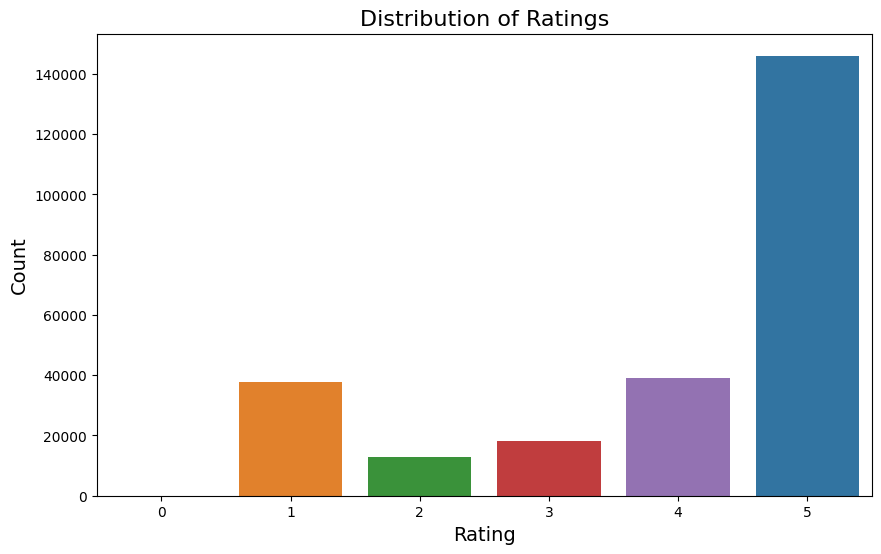

In [8]:
# Analyzing the distribution of ratings
# Define a custom color palette for the ratings
rating_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Blue, Orange, Green, Red, Purple

# Create the plot with custom colors
plt.figure(figsize=(10, 6))
sns.countplot(x='review_rating', data=df, palette=rating_colors)
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

### Length Of The Reviews

Next, we’ll analyze the length of the reviews, as this can sometimes correlate with the sentiment or detail of feedback. We will first calculate the length of each review and then visualize the data.



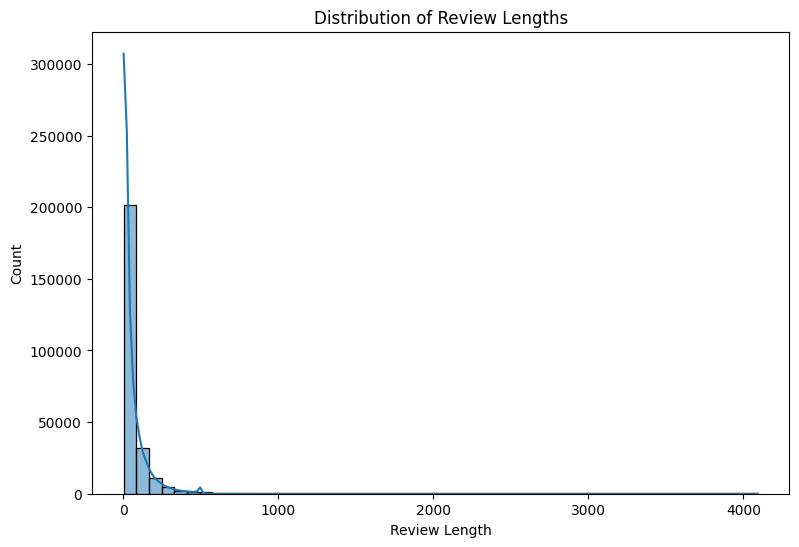

Average review length: 55.64 characters
Median review length: 24.0 characters


In [9]:
# Calculating the length of each review
df['review_length'] = df['review_text'].str.len()

plt.figure(figsize=(9, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

print(f"Average review length: {df['review_length'].mean():.2f} characters")
print(f"Median review length: {df['review_length'].median()} characters")


### Analyzing App Reviews Sentiments

Since our dataset is labelled, let’s perform app reviews sentiment analysis. We’ll begin by analyzing the distribution of sentiments across the dataset. It will give us a basic understanding of the general sentiment tendency in the reviews.

<ipython-input-10-02a106eb6b81>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette=sentiment_colors)


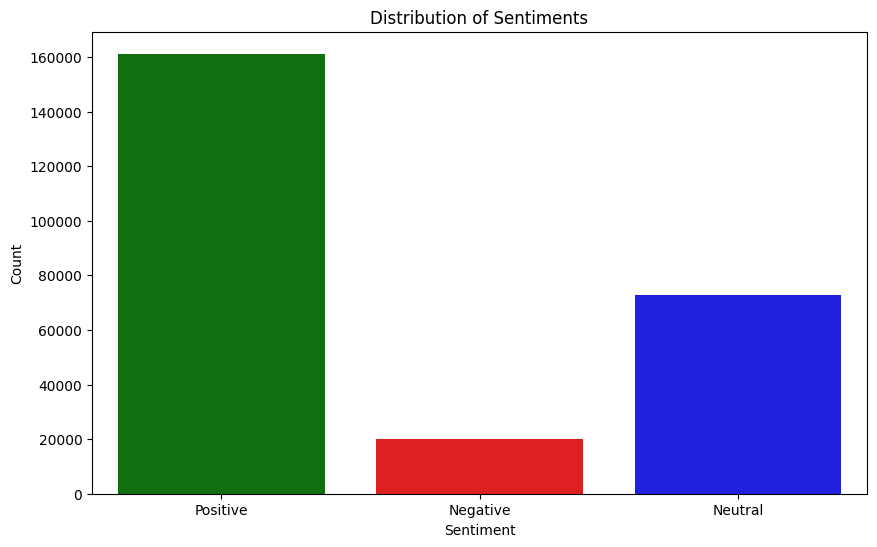

In [10]:
# Analyzing the distribution of sentiments
plt.figure(figsize=(10, 6))

# Define a custom color palette for the sentiments
sentiment_colors = ['green', 'red', 'blue']  # Corresponding to positive, neutral, negative

# Create the countplot with the custom color palette
sns.countplot(x='sentiment', data=df, palette=sentiment_colors)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### the relationship between the sentiments and the ratings

Next, we’ll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and the numerical rating. For this task, we can see how sentiments are distributed across different rating levels.

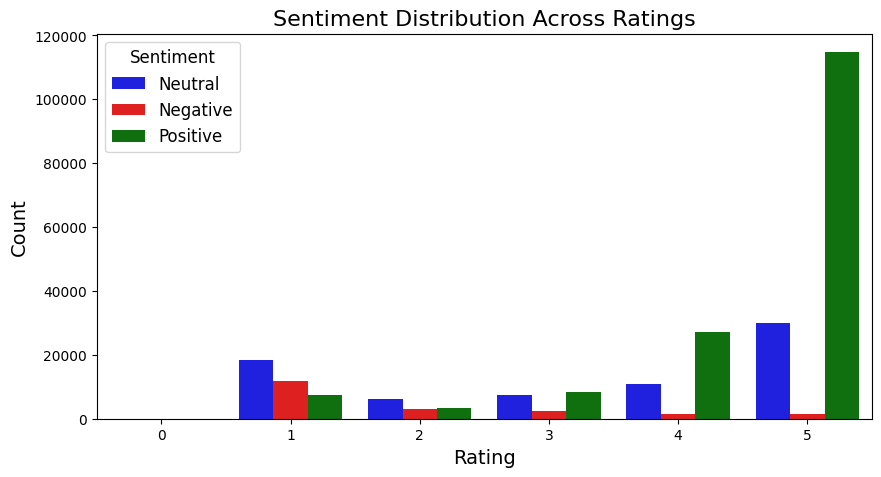

In [11]:
# Sentiment Distribution Across Rating

# Define the custom color palette for the sentiments
sentiment_colors = ['blue', 'red', 'green']  # Corresponding to Positive, Neutral, Negative

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='review_rating', hue='sentiment', palette=sentiment_colors)
plt.title('Sentiment Distribution Across Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Sentiment', fontsize=12, title_fontsize=12)
plt.show()

### the relationship between the sentiments and the author app version

Next, we’ll explore the relationship between the sentiments and the author app version. This analysis can help us understand whether there is a correlation between the sentiment of the text and the different app versions used by the authors. For this task, we can see how sentiments are distributed across different app version levels.

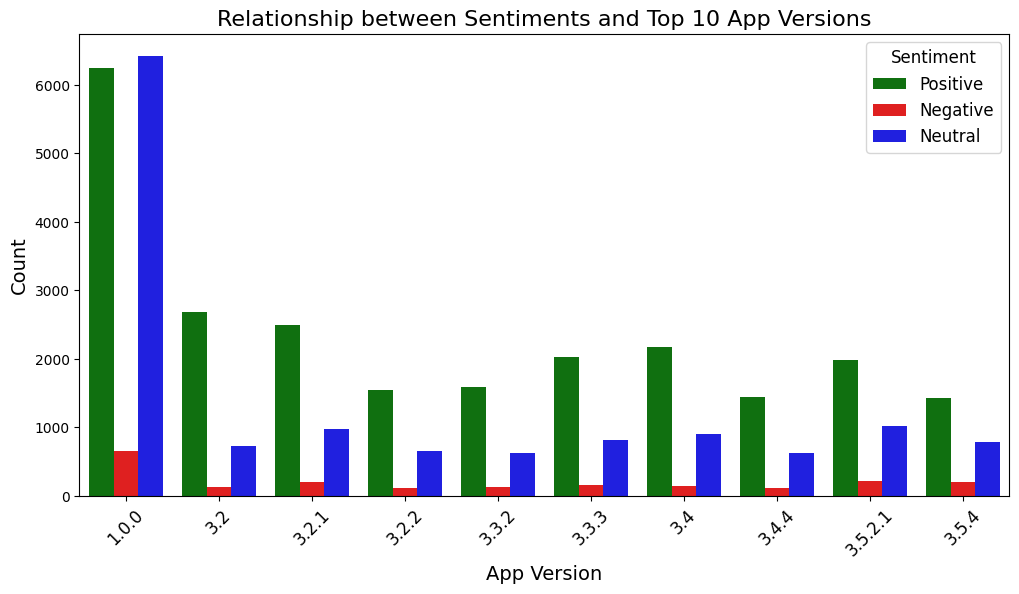

In [12]:
# Analyzing the relationship between sentiments and author_app_version

# First, let's get the top 10 most common app versions
top_versions = df['author_app_version'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))

# Define a custom color palette for the sentiments
sentiment_colors = ['green', 'red', 'blue']  # Positive, Neutral, Negative

# Create the countplot with the custom color palette
sns.countplot(x='author_app_version', hue='sentiment', data=df[df['author_app_version'].isin(top_versions)],
              palette=sentiment_colors)
plt.title('Relationship between Sentiments and Top 10 App Versions', fontsize=16)
plt.xlabel('App Version', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Sentiment', fontsize=12, title_fontsize=12)
plt.show()

### Identify Common Words

Now, let’s perform a text analysis to identify common words or themes within each sentiment category. It involves examining the most frequently occurring words in positive, negative, and neutral reviews using a word cloud.

In [13]:
# Identify common words or themes within each sentiment category
stop_words = set(stopwords.words('english'))

def get_top_words(text_series, n=10):
    words = [word.lower() for text in text_series for word in word_tokenize(text)
             if word.isalnum() and word.lower() not in stop_words]
    return Counter(words).most_common(n)

for sentiment in ['Negative', 'Neutral', 'Positive']:
    top_words = get_top_words(df[df['sentiment'] == sentiment]['review_text'])
    print(f"\nTop 10 words for {sentiment} reviews:")
    for word, count in top_words:
        print(f"{word}: {count}")


Top 10 words for Negative reviews:
app: 8889
linkedin: 2662
bad: 1754
update: 1740
time: 1656
account: 1623
unable: 1581
ca: 1570
even: 1449
please: 1413

Top 10 words for Neutral reviews:
app: 16637
linkedin: 5883
like: 4016
update: 3472
ca: 3377
job: 3306
please: 2903
use: 2721
time: 2617
get: 2579

Top 10 words for Positive reviews:
app: 46117
good: 42281
great: 25315
nice: 13472
linkedin: 10316
excellent: 9629
best: 9450
job: 8443
professional: 7352
love: 7157


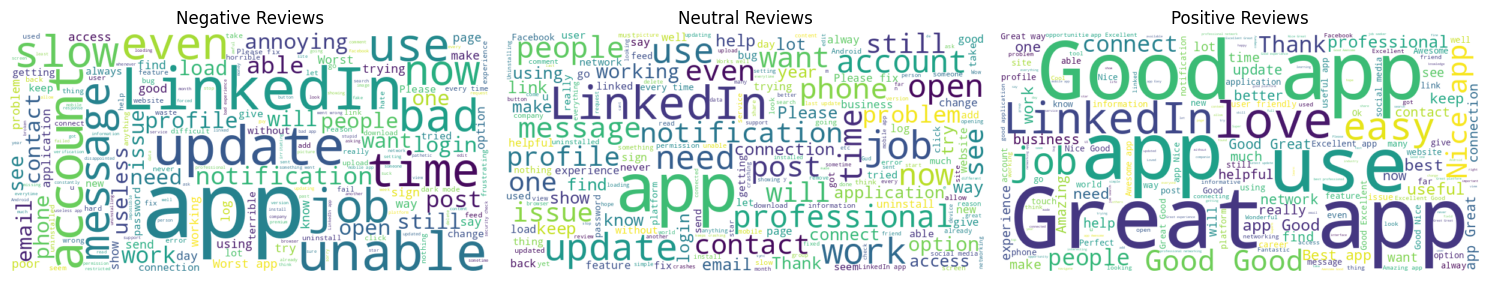

In [14]:
# Word cloud for each sentiment
from wordcloud import WordCloud

plt.figure(figsize=(15, 5))
for i, sentiment in enumerate(['Negative', 'Neutral', 'Positive']):
    text = ' '.join(df[df['sentiment'] == sentiment]['review_text'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

    plt.subplot(1, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment} Reviews')
    plt.axis('off')
plt.tight_layout()
plt.show()